In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import r2_score

from sklearn.linear_model import ElasticNet,Lasso,Ridge,lasso_path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 

In [3]:
#Exercise 1
s = 10
n = 1000
p = 5000

beta = np.concatenate((np.ones(s),np.zeros(p-s)))
X = np.random.normal(0,1,(n,p))
eta = np.random.normal(0,1,n)
Y = np.dot(X,beta)+eta

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 2/3)

In [5]:
#excise 1 (a)
Alpha = np.linspace(0,1,11)[1:]
for a in Alpha:
    print(ElasticNet(alpha = a).fit(X_train,y_train).coef_)

[ 0.67835486  0.57919758  0.77358073 ... -0.         -0.
  0.        ]
[ 0.64706121  0.54138658  0.74200518 ...  0.         -0.
  0.        ]
[ 0.6053969   0.50110757  0.70919035 ...  0.         -0.
  0.        ]
[ 0.56088107  0.45071225  0.66604039 ...  0.         -0.
  0.        ]
[ 0.51422941  0.38828732  0.61715437 ...  0.         -0.
  0.        ]
[ 0.46377295  0.32373517  0.56512187 ...  0.         -0.
  0.        ]
[ 0.41283094  0.26358475  0.51506184 ...  0.         -0.
  0.        ]
[ 0.36208049  0.20486407  0.46626944 ...  0.         -0.
  0.        ]
[ 0.31371098  0.1504765   0.42030692 ...  0.         -0.
  0.        ]
[ 0.2678557   0.09833472  0.37520429 ...  0.         -0.
  0.        ]


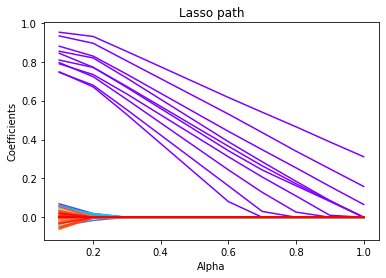

In [6]:
#excise 1 (b)

alpha_for_path, coefs_lasso, _ = lasso_path(X_train,y_train,alphas=Alpha)
Colors = cm.rainbow(np.linspace(0,1,coefs_lasso.shape[0]))

for i in range(coefs_lasso.shape[0]): 
    plt.plot(alpha_for_path,coefs_lasso[i],c=Colors[i])

plt.xlabel('Alpha') 
plt.ylabel('Coefficients') 
plt.title('Lasso path') 
plt.show() 


In [7]:
#excise 1 (c)
#Lasso
for a in Alpha:
    y_pred = Lasso(alpha = a).fit(X_train,y_train).predict(X_test)
    print("alpha :{:2f} | predicict :{}".format(a,r2_score(y_test, y_pred)))

alpha :0.100000 | predicict :0.8760489389520898
alpha :0.200000 | predicict :0.8614876076029929
alpha :0.300000 | predicict :0.8080858294536128
alpha :0.400000 | predicict :0.7311543191637402
alpha :0.500000 | predicict :0.6323811729185591
alpha :0.600000 | predicict :0.5117653068581356
alpha :0.700000 | predicict :0.38740039600176146
alpha :0.800000 | predicict :0.27940086991892066
alpha :0.900000 | predicict :0.1786732089375983
alpha :1.000000 | predicict :0.09188335078431886


In [8]:
#Ridge
for a in Alpha:
    y_pred = Ridge(alpha = a).fit(X_train,y_train).predict(X_test)
    print("alpha :{:2f} | predicict :{}".format(a,r2_score(y_test, y_pred)))

alpha :0.100000 | predicict :0.08543628715524398
alpha :0.200000 | predicict :0.0854358231174207
alpha :0.300000 | predicict :0.0854353590418595
alpha :0.400000 | predicict :0.08543489492856726
alpha :0.500000 | predicict :0.08543443077755064
alpha :0.600000 | predicict :0.08543396658881652
alpha :0.700000 | predicict :0.08543350236237168
alpha :0.800000 | predicict :0.08543303809822289
alpha :0.900000 | predicict :0.08543257379637681
alpha :1.000000 | predicict :0.08543210945684043


In [11]:
#ElasticNet
Lambda = np.linspace(0,1,12)[1:]
for a in Alpha:
    for l in Lambda:
        y_pred = ElasticNet(l1_ratio = l,alpha = a).fit(X_train,y_train).predict(X_test)
        print("alpha :{:2f} | lambda :{:2f} | predicict :{}".format(a,l,r2_score(y_test, y_pred)))

alpha :0.100000 | lambda :0.090909 | predicict :0.363807816084294
alpha :0.100000 | lambda :0.181818 | predicict :0.5366014755520427
alpha :0.100000 | lambda :0.272727 | predicict :0.6613879655539827
alpha :0.100000 | lambda :0.363636 | predicict :0.737657093481209
alpha :0.100000 | lambda :0.454545 | predicict :0.7836945191270862
alpha :0.100000 | lambda :0.545455 | predicict :0.8157219694265424
alpha :0.100000 | lambda :0.636364 | predicict :0.8368143112852532
alpha :0.100000 | lambda :0.727273 | predicict :0.85231791401071
alpha :0.100000 | lambda :0.818182 | predicict :0.8628090392207857
alpha :0.100000 | lambda :0.909091 | predicict :0.8703465225184448
alpha :0.100000 | lambda :1.000000 | predicict :0.8760489389520898
alpha :0.200000 | lambda :0.090909 | predicict :0.36230720522682425
alpha :0.200000 | lambda :0.181818 | predicict :0.5324353075647899
alpha :0.200000 | lambda :0.272727 | predicict :0.6555015888199569
alpha :0.200000 | lambda :0.363636 | predicict :0.734263964589418

##### Exercise 1 question 1 (d)

The best estimator of the sample is the the estimator Lasso

In [93]:
#Exercise 1 question 2 
s = 1500
n = 1000
p = 5000

beta = np.concatenate((np.zeros(s),np.ones(p-s)))
X = np.random.normal(0,1,(n,p))
eta = np.random.normal(0,1,n)
Y = np.dot(X,beta)+eta

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 2/3)

In [12]:
#lasso
for a in Alpha:
    y_pred = Lasso(alpha = a).fit(X_train,y_train).predict(X_test)
    print("alpha :{:2f} | predicict :{}".format(a,r2_score(y_test, y_pred)))

alpha :0.100000 | predicict :0.8760489389520898
alpha :0.200000 | predicict :0.8614876076029929
alpha :0.300000 | predicict :0.8080858294536128
alpha :0.400000 | predicict :0.7311543191637402
alpha :0.500000 | predicict :0.6323811729185591
alpha :0.600000 | predicict :0.5117653068581356
alpha :0.700000 | predicict :0.38740039600176146
alpha :0.800000 | predicict :0.27940086991892066
alpha :0.900000 | predicict :0.1786732089375983
alpha :1.000000 | predicict :0.09188335078431886


In [13]:
#Ridge
for a in Alpha:
    y_pred = Ridge(alpha = a).fit(X_train,y_train).predict(X_test)
    print("alpha :{:2f} | predicict :{}".format(a,r2_score(y_test, y_pred)))

alpha :0.100000 | predicict :0.08543628715524398
alpha :0.200000 | predicict :0.0854358231174207
alpha :0.300000 | predicict :0.0854353590418595
alpha :0.400000 | predicict :0.08543489492856726
alpha :0.500000 | predicict :0.08543443077755064
alpha :0.600000 | predicict :0.08543396658881652
alpha :0.700000 | predicict :0.08543350236237168
alpha :0.800000 | predicict :0.08543303809822289
alpha :0.900000 | predicict :0.08543257379637681
alpha :1.000000 | predicict :0.08543210945684043


In [14]:
#ElasticNet
Lambda = np.linspace(0,5,12)[1:]
for a in Alpha:
    for l in Lambda:
        y_pred = ElasticNet(l1_ratio = l,alpha = a).fit(X_train,y_train).predict(X_test)
        print("alpha :{:2f} | lambda :{:2f} | predicict :{}".format(a,l,r2_score(y_test, y_pred)))

alpha :0.100000 | lambda :0.454545 | predicict :0.7836945191270861
alpha :0.100000 | lambda :0.909091 | predicict :0.8703465225184448
alpha :0.100000 | lambda :1.363636 | predicict :0.8885695321442527
alpha :0.100000 | lambda :1.818182 | predicict :0.8931601539182425
alpha :0.100000 | lambda :2.272727 | predicict :0.891143792261042
alpha :0.100000 | lambda :2.727273 | predicict :0.8884542362144697
alpha :0.100000 | lambda :3.181818 | predicict :0.8851170422353178
alpha :0.100000 | lambda :3.636364 | predicict :0.8809008516102653
alpha :0.100000 | lambda :4.090909 | predicict :0.8754595412414614
alpha :0.100000 | lambda :4.545455 | predicict :0.868248806256344
alpha :0.100000 | lambda :5.000000 | predicict :0.8583796062698917
alpha :0.200000 | lambda :0.454545 | predicict :0.7829058841967944
alpha :0.200000 | lambda :0.909091 | predicict :0.859880210920361
alpha :0.200000 | lambda :1.363636 | predicict :0.8539734529273999
alpha :0.200000 | lambda :1.818182 | predicict :0.837923454798995

###### Exercise 1 question2

The best estimator of the sample is the the estimator ElasticNet.

In [12]:
#exerice1 question 3
s = 14
n = 100
p = 50
beta = np.concatenate((np.array([10,10,5,5]),np.ones(10),np.zeros(p-s)))
MU = np.zeros(p)
SIGMA = np.array([[0.7**abs(i-j) for j in range(1,p+1)] for i in range(1,p+1)])
X = np.random.multivariate_normal(MU, SIGMA, size = n)
eta = np.random.normal(0,1,n)
Y = np.dot(X,beta)+eta

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 2/3)

In [14]:
#lasso
for a in Alpha:
    y_pred = Lasso(alpha = a).fit(X_train,y_train).predict(X_test)
    print("alpha :{:2f} | predicict :{}".format(a,r2_score(y_test, y_pred)))

alpha :0.100000 | predicict :0.9984249161660517
alpha :0.200000 | predicict :0.9981551204527267
alpha :0.300000 | predicict :0.997741571143759
alpha :0.400000 | predicict :0.9970714594909239
alpha :0.500000 | predicict :0.9961553790523462
alpha :0.600000 | predicict :0.9950327072206954
alpha :0.700000 | predicict :0.9939932041950628
alpha :0.800000 | predicict :0.9928347485639063
alpha :0.900000 | predicict :0.9915219735857297
alpha :1.000000 | predicict :0.9902181010214397


In [15]:
#Ridge
for a in Alpha:
    y_pred = Ridge(alpha = a).fit(X_train,y_train).predict(X_test)
    print("alpha :{:2f} | predicict :{}".format(a,r2_score(y_test, y_pred)))

alpha :0.100000 | predicict :0.9844656274561334
alpha :0.200000 | predicict :0.9842262724024771
alpha :0.300000 | predicict :0.9839832954185158
alpha :0.400000 | predicict :0.9837381913224402
alpha :0.500000 | predicict :0.9834919633803008
alpha :0.600000 | predicict :0.9832452846298717
alpha :0.700000 | predicict :0.9829986028594615
alpha :0.800000 | predicict :0.9827522103798039
alpha :0.900000 | predicict :0.9825062912422685
alpha :1.000000 | predicict :0.9822609536912467


In [17]:
#ElasticNet
Lambda = np.linspace(0,1,12)[1:]
for a in Alpha:
    for l in Lambda:
        y_pred = ElasticNet(l1_ratio = l,alpha = a).fit(X_train,y_train).predict(X_test)
        print("alpha :{:2f} | lambda :{:2f} | predicict :{}".format(a,l,r2_score(y_test, y_pred)))

alpha :0.100000 | lambda :0.090909 | predicict :0.9801211332208302
alpha :0.100000 | lambda :0.181818 | predicict :0.9834831379776237
alpha :0.100000 | lambda :0.272727 | predicict :0.9862814598176424
alpha :0.100000 | lambda :0.363636 | predicict :0.988834151646369
alpha :0.100000 | lambda :0.454545 | predicict :0.991030495426636
alpha :0.100000 | lambda :0.545455 | predicict :0.9933332388508133
alpha :0.100000 | lambda :0.636364 | predicict :0.9955076877906462
alpha :0.100000 | lambda :0.727273 | predicict :0.9971932341157332
alpha :0.100000 | lambda :0.818182 | predicict :0.9981477084600555
alpha :0.100000 | lambda :0.909091 | predicict :0.9983452500423349
alpha :0.100000 | lambda :1.000000 | predicict :0.9984249161660517
alpha :0.200000 | lambda :0.090909 | predicict :0.9729579088692486
alpha :0.200000 | lambda :0.181818 | predicict :0.9772731134330273
alpha :0.200000 | lambda :0.272727 | predicict :0.9813630798187081
alpha :0.200000 | lambda :0.363636 | predicict :0.98489468579549

###### Exercise 1 question3

The best estimator of the sample is the the estimator ElasticNet with $\alpha = 0.3$ and $\lambda = 0.909091 $.
\
globaly the best estimator is estimator Ridge


###### Exercise 2


In [15]:
import pandas as pd
L = ["Class","Alcool","Malic acid","ash","Alcalinity of ash ","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",names = L)
df = pd.DataFrame(StandardScaler().fit_transform(df),columns = L)

In [16]:
Y = df["Alcool"]
X = df[L[2:]]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 2/3)

In [18]:
#lasso
for a in Alpha:
    y_pred = Lasso(alpha = a).fit(X_train,y_train).predict(X_test)
    print("alpha :{:2f} | predicict :{}".format(a,r2_score(y_test, y_pred)))

alpha :0.100000 | predicict :0.4540202018874736
alpha :0.200000 | predicict :0.4400115465315214
alpha :0.300000 | predicict :0.40453660018726556
alpha :0.400000 | predicict :0.35089981998789743
alpha :0.500000 | predicict :0.27758666674217447
alpha :0.600000 | predicict :0.19880966520313936
alpha :0.700000 | predicict :0.13203472207020528
alpha :0.800000 | predicict :0.05059887564696586
alpha :0.900000 | predicict :-0.0024114092559335276
alpha :1.000000 | predicict :-0.0024114092559335276


In [19]:
#Ridge
for a in Alpha:
    y_pred = Ridge(alpha = a).fit(X_train,y_train).predict(X_test)
    print("alpha :{:2f} | predicict :{}".format(a,r2_score(y_test, y_pred)))
    

alpha :0.100000 | predicict :0.28366550187451955
alpha :0.200000 | predicict :0.28669073570212844
alpha :0.300000 | predicict :0.2896388892341176
alpha :0.400000 | predicict :0.2925130557831742
alpha :0.500000 | predicict :0.2953161482185901
alpha :0.600000 | predicict :0.2980509129984499
alpha :0.700000 | predicict :0.300719942839759
alpha :0.800000 | predicict :0.3033256881833435
alpha :0.900000 | predicict :0.3058704675897359
alpha :1.000000 | predicict :0.3083564771846141


In [20]:
#ElasticNet
Lambda = np.linspace(0,5,12)[1:]
for a in Alpha:
    for l in Lambda:
        y_pred = ElasticNet(l1_ratio = l,alpha = a).fit(X_train,y_train).predict(X_test)
        print("alpha :{:2f} | lambda :{:2f} | predicict :{}".format(a,l,r2_score(y_test, y_pred)))

alpha :0.100000 | lambda :0.454545 | predicict :0.44929687150216957
alpha :0.100000 | lambda :0.909091 | predicict :0.4538172751600902
alpha :0.100000 | lambda :1.363636 | predicict :0.45460665990286986
alpha :0.100000 | lambda :1.818182 | predicict :0.44609812501348556
alpha :0.100000 | lambda :2.272727 | predicict :0.43643012013499405
alpha :0.100000 | lambda :2.727273 | predicict :0.42432024424392123
alpha :0.100000 | lambda :3.181818 | predicict :0.40725249829162713
alpha :0.100000 | lambda :3.636364 | predicict :0.38342361292184224
alpha :0.100000 | lambda :4.090909 | predicict :0.3498842323182716
alpha :0.100000 | lambda :4.545455 | predicict :0.3136685459896944
alpha :0.100000 | lambda :5.000000 | predicict :0.30820676202321684
alpha :0.200000 | lambda :0.454545 | predicict :0.4535222412216968
alpha :0.200000 | lambda :0.909091 | predicict :0.44518899148647073
alpha :0.200000 | lambda :1.363636 | predicict :0.4208115669470657
alpha :0.200000 | lambda :1.818182 | predicict :0.384

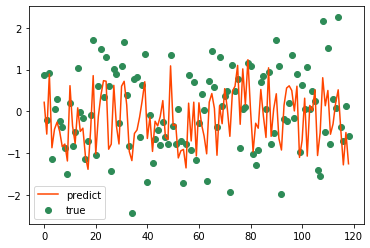

In [22]:
y_pred = ElasticNet(l1_ratio = 0.909091,alpha = 0.1).fit(X_train,y_train).predict(X_test)
plt.scatter(np.arange(len(y_test)),y_test,color="seagreen",label = "true")
plt.plot(np.arange(len(y_pred)),y_pred,color = "orangered",label="predict")
plt.legend()
plt.show()